### Mahema Reddy Nelaturi 
### Github username: mahemareddy
### 2814429305


## 1. Combined Cycle Power Plant Data Set

### (a) Download Data

#### Importing necessary packages 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import tabulate
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors, KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import euclidean_distances

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Importing Data set 

In [3]:
relpath = "../data/CCPP/Folds5x2_pp.xlsx"
df = pd.read_excel(relpath)
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


### (b) Exploring the data:

### i. How many rows are in this data set? How many columns? What do the rows and columns represent?

In [4]:
print("Number of Rows: ", df.shape[0])
print("Number of Columns: ", df.shape[1])

Number of Rows:  9568
Number of Columns:  5


The dataset contains 9568 rows collected from a Combined Cycle Power Plant.
The Columns are:
- Ambient Temperature (AT) 
- Vacuum (V) 
- Ambient Pressure (AP) 
- Relative Humidity (RH) 
It predicts the hourly energy output of the plant (Energy Output (EP))

### ii. Make pairwise scatterplots of all the variables in the data set including the predictors (independent variables) with the dependent variable. Describe your findings.

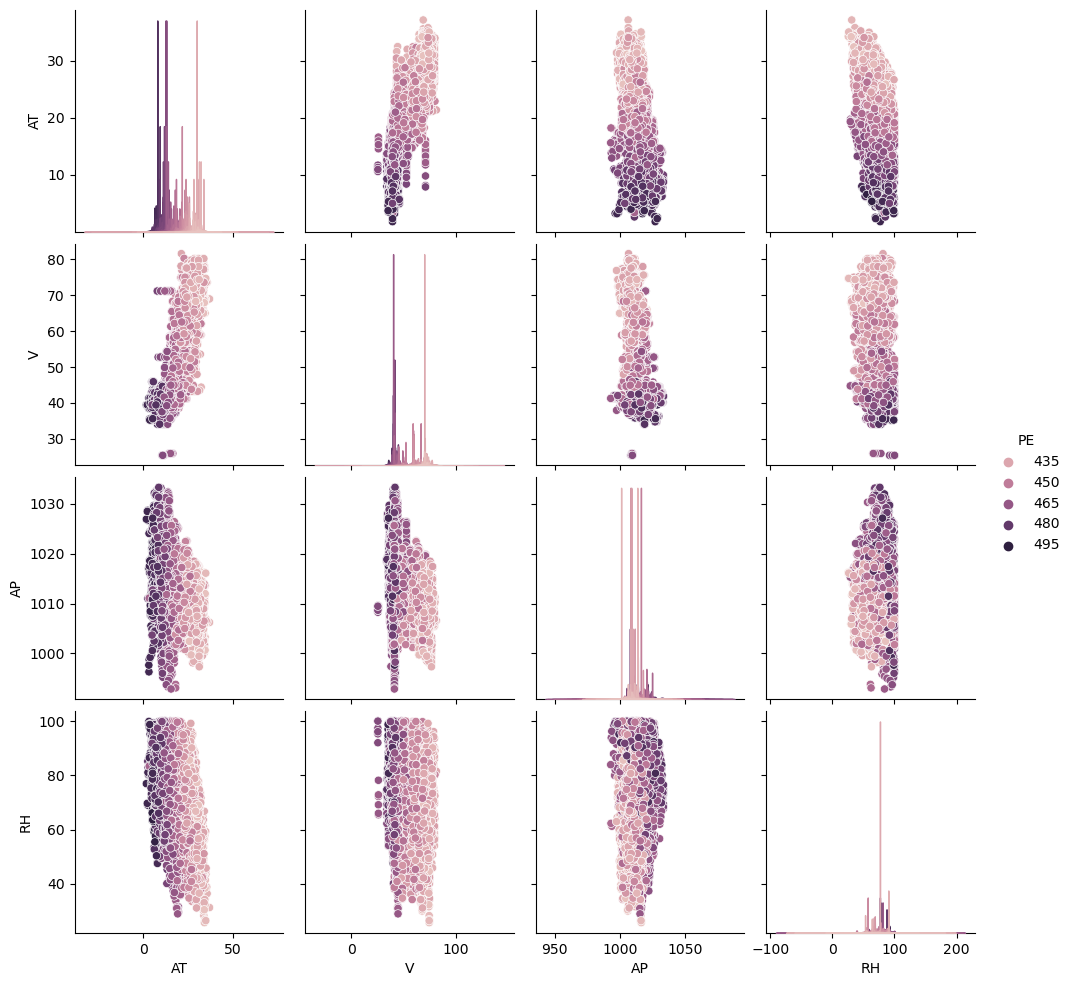

In [5]:
sns.pairplot(data = df, hue = "PE")

**Inference:**
- AT is positively correlated with V
- AT is negatively correlated with PE
- V is negatively correlated with PE

### iii. What are the mean, the median, range, first and third quartiles, and in-terquartile ranges of each of the variables in the dataset? Summarize themin a table.

In [6]:
df_stats = df.describe()
df_stats.loc["range"] = df_stats.loc["max"] - df_stats.loc["min"]
df_stats.loc["IQR"] = df_stats.loc["75%"] - df_stats.loc["25%"]
df_stats.loc["median"] = df_stats.loc["50%"]
df_stats

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000
range,35.300000,56.200000,40.410000,74.600000,75.500000
IQR,12.210000,24.800000,8.160000,21.502500,28.680000


### (c) For each predictor, fit a simple linear regression model to predict the response. Describe your results

In [7]:
THRESHOLD = 4 / len(df)
y = df["PE"].to_numpy()

##  Ambient Temperature (AT)

In [8]:
model_AT = smf.ols("PE~AT", df).fit()
pred_AT = model_AT.predict(df)
model_AT.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                        14:31:00   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    497.0341      0.156   3177.280      0.000     496.727     497.341
AT            -2.1713      0.007   -291.715      0.000      -2.186      -2.157
==============================================================================
Omnibus:                      417.457   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1117.844
Skew:                          -0.209   Prob(JB):                    1.83e-243
Kurtosis:                       4.621   Cond. No.                         59.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
influence = model_AT.get_influence()
cooks = influence.cooks_distance
outliers_AT = np.where(cooks[0] > THRESHOLD)
print("OUTLIERS FOR FEATURE \"AT\": ", len(outliers_AT[0]))

OUTLIERS FOR FEATURE "AT":  416


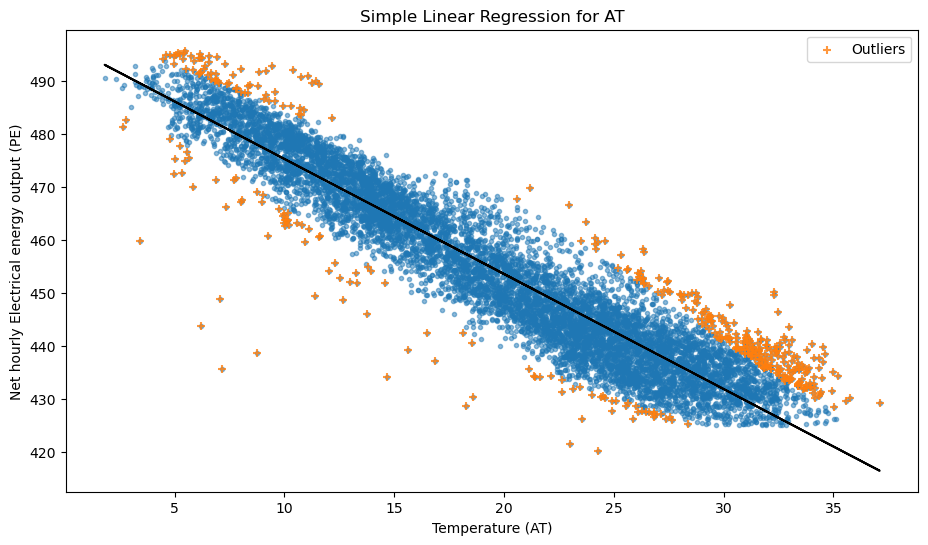

In [10]:
x = df["AT"].to_numpy()
plt.figure(figsize= (11, 6))
plt.scatter(df["AT"], df["PE"], marker= ".", label= "", alpha= 0.5)
plt.scatter(x[outliers_AT], y[outliers_AT], marker= "+", label= "Outliers", alpha= 0.8)
plt.plot(df["AT"], pred_AT, color = "black")
plt.title("Simple Linear Regression for AT")
plt.xlabel("Temperature (AT)")
plt.ylabel("Net hourly Electrical energy output (PE)")
plt.legend()
plt.show()


## Exhaust Vacuum (V)

In [11]:
model_V = smf.ols("PE~V", df).fit()
pred_V = model_V.predict(df)
model_V.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                        14:31:00   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    517.8015      0.378   1370.218      0.000     517.061     518.542
V             -1.1681      0.007   -172.402      0.000      -1.181      -1.155
==============================================================================
Omnibus:                       77.693   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.571
Skew:                          -0.097   Prob(JB):                     1.61e-24
Kurtosis:                       3.487   Cond. No.                         245.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
influence = model_V.get_influence()
cooks = influence.cooks_distance
outliers_V = np.where(cooks[0] > THRESHOLD)
print("OUTLIERS FOR FEATURE \"V\": ", len(outliers_V[0]))

OUTLIERS FOR FEATURE "V":  423


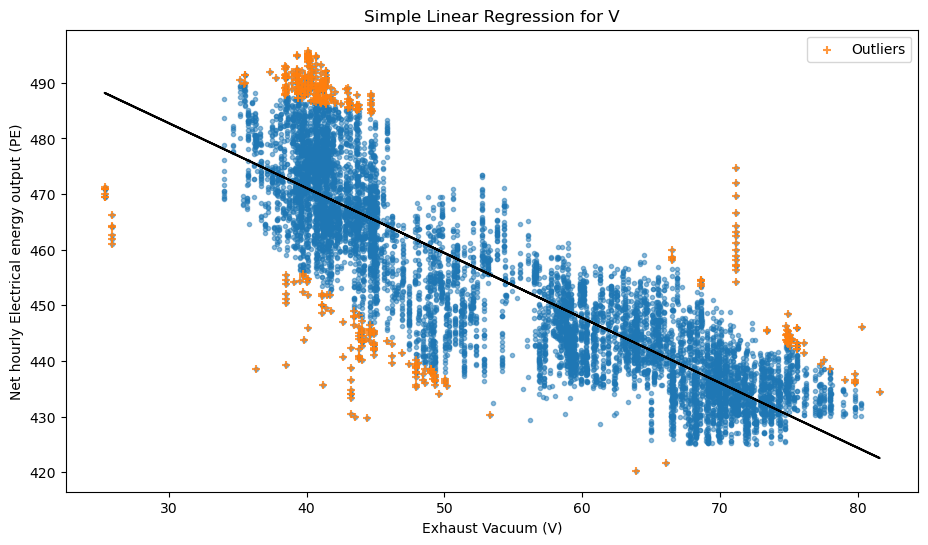

In [13]:
x = df["V"].to_numpy()
plt.figure(figsize= (11, 6))
plt.scatter(df["V"], df["PE"], marker= ".", label= "", alpha= 0.5)
plt.scatter(x[outliers_V], y[outliers_V], marker= "+", label= "Outliers", alpha= 0.8)
plt.plot(df["V"], pred_V, color = "black")
plt.title("Simple Linear Regression for V")
plt.xlabel("Exhaust Vacuum (V)")
plt.ylabel("Net hourly Electrical energy output (PE)")
plt.legend()
plt.show()

## Ambient Pressure (AP)

In [14]:
model_AP = smf.ols("PE~AP", df).fit()
pred_AP = model_AP.predict(df)
model_AP.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                        14:31:00   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1055.2610     25.459    -41.449      0.000   -1105.167   -1005.355
AP             1.4899      0.025     59.296      0.000       1.441       1.539
==============================================================================
Omnibus:                      525.438   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.290
Skew:                           0.616   Prob(JB):                    1.10e-133
Kurtosis:                       2.859   Cond. No.                     1.73e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
influence = model_AP.get_influence()
cooks = influence.cooks_distance
outliers_AP = np.where(cooks[0] > THRESHOLD)
print("OUTLIERS FOR FEATURE \"AP\": ", len(outliers_AP[0]))

OUTLIERS FOR FEATURE "AP":  300


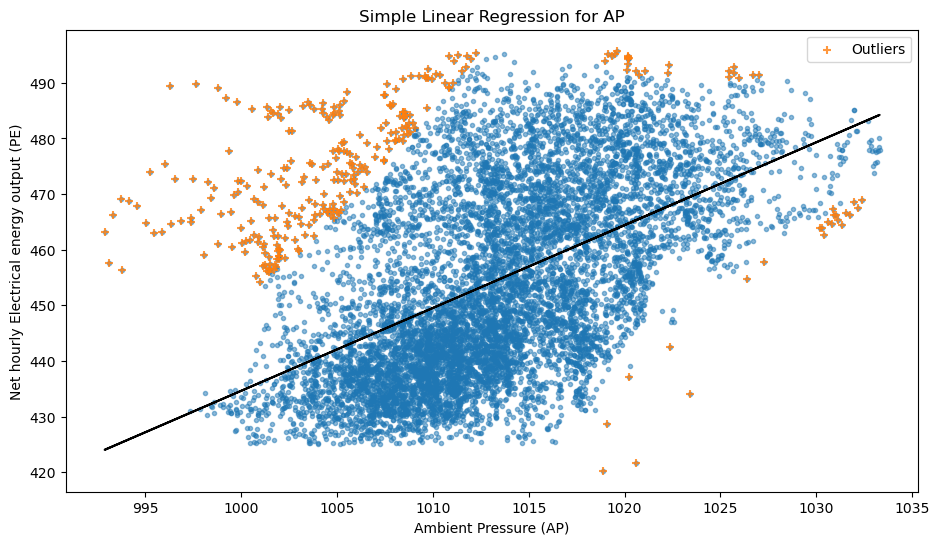

In [16]:
x = df["AP"].to_numpy()
plt.figure(figsize= (11, 6))
plt.scatter(df["AP"], df["PE"], marker= ".", label= "", alpha= 0.5)
plt.scatter(x[outliers_AP], y[outliers_AP], marker= "+", label= "Outliers", alpha= 0.8)
plt.plot(df["AP"], pred_AP, color = "black")
plt.title("Simple Linear Regression for AP")
plt.xlabel("Ambient Pressure (AP)")
plt.ylabel("Net hourly Electrical energy output (PE)")
plt.legend()
plt.show()

## Relative Humidity (RH)

In [17]:
model_RH = smf.ols("PE~RH", df).fit()
pred_RH = model_RH.predict(df)
model_RH.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                        14:31:00   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    420.9618      0.823    511.676      0.000     419.349     422.574
RH             0.4557      0.011     41.399      0.000       0.434       0.477
==============================================================================
Omnibus:                      772.278   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              319.245
Skew:                           0.231   Prob(JB):                     4.75e-70
Kurtosis:                       2.234   Cond. No.                         383.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
influence = model_RH.get_influence()
cooks = influence.cooks_distance
outliers_RH = np.where(cooks[0] > THRESHOLD)
print("OUTLIERS FOR FEATURE \"RH\": ", len(outliers_RH[0]))

OUTLIERS FOR FEATURE "RH":  249


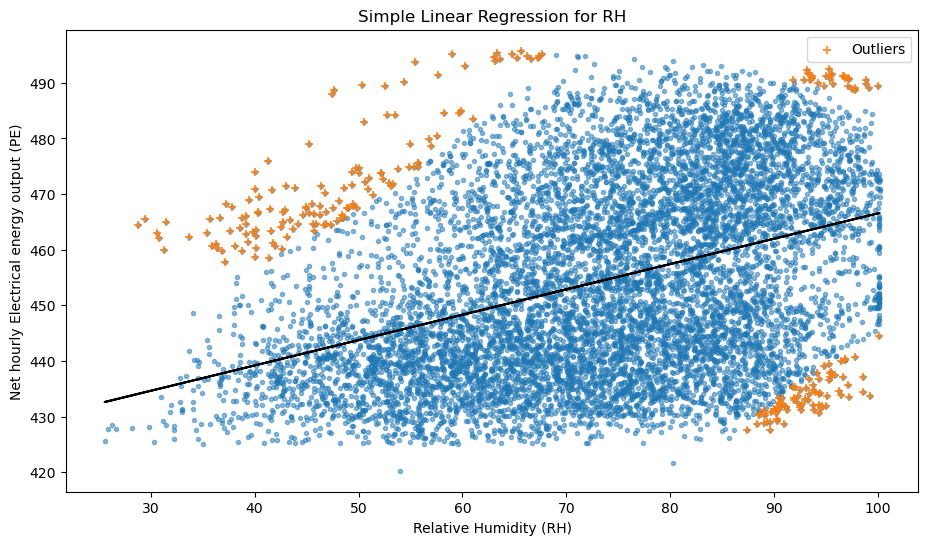

In [19]:
x = df["RH"].to_numpy()
plt.figure(figsize= (11, 6))
plt.scatter(df["RH"], df["PE"], marker= ".", label= "", alpha= 0.5)
plt.scatter(x[outliers_RH], y[outliers_RH], marker= "+", label= "Outliers", alpha= 0.8)
plt.plot(df["RH"], pred_RH, color = "black")
plt.title("Simple Linear Regression for RH")
plt.xlabel("Relative Humidity (RH)")
plt.ylabel("Net hourly Electrical energy output (PE)")
plt.legend()
plt.show()

### All of the features are statistically significantd as per the p-value since it is 0.

### Are there any outliers that you would like to remove from your data for each of these regression tasks?
### ANSWER: YES, there are ouliers that have to be removed 

### (d) Fit a multiple regression model to predict the response using all of the predictors. Describe your results

In [20]:
model = smf.ols('PE~AT+V+AP+RH',df).fit()
pred = model.predict(df)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                        14:31:01   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    454.6093      9.749     46.634      0.000     435.500     473.718
AT            -1.9775      0.015   -129.342      0.000      -2.007      -1.948
V             -0.2339      0.007    -32.122      0.000      -0.248      -0.220
AP             0.0621      0.009      6.564      0.000       0.044       0.081
RH            -0.1581      0.004    -37.918      0.000      -0.166      -0.150
==============================================================================
Omnibus:                      892.002   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4086.777
Skew:                          -0.352   Prob(JB):                         0.00
Kurtosis:                       6.123   Cond. No.                     2.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### The null hypothesis can be rejected for all the predictors since for all of them the p-value is 0.

### (e) How do your results from 1c compare to your results from 1d?

In [21]:
columns = ["Predictors", "Linear Regression", "Multiple Regression"]
coeffs = [
    ["AT", model_AT.params[1], model.params[1]],
    ["V", model_V.params[1], model.params[2]],
    ["AP", model_AP.params[1], model.params[3]],
    ["RH", model_RH.params[1], model.params[4]]
]
coeff_table = pd.DataFrame(coeffs, columns= columns)
coeff_table

,Predictors,Linear Regression,Multiple Regression
0,AT,-2.171320,-1.977513
1,V,-1.168135,-0.233916
2,AP,1.489872,0.062083
3,RH,0.455650,-0.158054


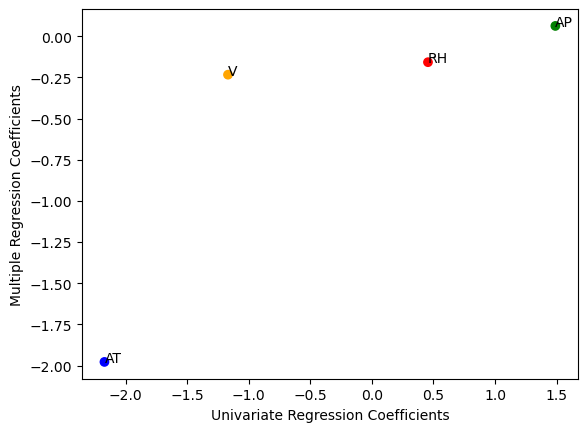

In [22]:
fig, axes = plt.subplots()
axes.scatter(coeff_table["Linear Regression"], coeff_table["Multiple Regression"],
            color= ["blue", "orange", "green", "red"])
for i, feature in enumerate(coeff_table["Predictors"]):
    axes.annotate(feature, (coeff_table["Linear Regression"][i], coeff_table["Multiple Regression"][i]))
plt.xlabel('Univariate Regression Coefficients')
plt.ylabel('Multiple Regression Coefficients')
plt.show()

### (f) Is there evidence of nonlinear association between any of the predictors and the response? 

In [23]:
predictors = ["AT", "V", "AP", "RH"]

In [24]:
for p in predictors:
    poly = PolynomialFeatures(3)
    trainingX_poly = poly.fit_transform(df[p].to_numpy().reshape(-1, 1))
    model = sm.OLS(df["PE"].to_numpy(), trainingX_poly).fit()
    print("Feature " + p + ": ")
    print(model.summary())
    print("\n")
    #print("*************************************************************************************")
    print("*************************************************************************************\n")

Feature AT: 
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                        14:31:01   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    732

- For features AT, AP and RH, the p-value is very small, which means there is evidence of a non-linear association between the predictors and the response.
- However, for predictor V, the p-value for x^2 and x^3 is not negligible. Hence, there is no non-linear association between the predictors and the response.

### (g) Is there evidence of association of interactions of predictors with the response?

In [25]:
association_model = smf.ols(formula = 'PE ~ AT + V + AP + RH + AT*V + AT*AP + AT*RH + V*AP + V*RH + AP*RH', 
                data = df).fit()
print(association_model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                        14:31:01   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.0

- Considering p = 0.05, **V, AP, RH, AT:V, AT:RH, V:AP, AP:RH** are statistically significant.
- Considering p = 0.10, **AT, V:RH** are statistically significant.
- **AT:AP** have very large p-values and are not statistically significant

### (h) Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response?

In [26]:
train, test = train_test_split(df, test_size= 0.3, random_state= 0)

In [27]:
x=df.iloc[:,:4]
y=df.iloc[:,4]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state= 0)

In [28]:
normal_slm  = smf.ols("PE ~ AT + V + AP + RH", train).fit()
pred_normal_slm_train = normal_slm.predict(train)
pred_normal_slm_train

4507    464.785870
287     448.250027
4018    448.955620
4624    455.149754
8507    443.398199
           ...    
7891    460.143902
9225    467.870994
4859    463.777823
3264    469.586635
2732    431.261310
Length: 6697, dtype: float64

In [29]:
pred_normal_slm_test = normal_slm.predict(test)
pred_normal_slm_test

4834    431.402451
1768    458.614741
2819    462.819674
7779    448.601237
7065    457.879479
           ...    
9339    472.027234
4871    474.005522
5128    432.473808
7947    436.164172
6409    439.007146
Length: 2871, dtype: float64

In [30]:
train_error_slm = mean_squared_error(y_train, pred_normal_slm_train)
test_error_slm = mean_squared_error(y_test, pred_normal_slm_test)
print("Training MSE: ", train_error_slm)
print("Testing MSE: ", test_error_slm)

Training MSE:  20.941563616739582
Testing MSE:  20.368383002885885


In [31]:
all_terms_slm = smf.ols('PE ~ AT + V + AP + RH + I(AT**2) + AT*V + AT*AP + AT*RH + V*AP + V*RH + AP*RH  + I(V**2) + I(AP**2) + I(RH**2)', 
                        train).fit()
pred_all_term_slm = all_terms_slm.predict(test)
pred_all_term_slm

4834    432.901430
1768    457.504358
2819    462.156619
7779    447.794369
7065    456.402561
           ...    
9339    471.346787
4871    473.497093
5128    436.137866
7947    435.348017
6409    439.044116
Length: 2871, dtype: float64

In [32]:
test_error_all_terms = mean_squared_error(y_test, pred_all_term_slm)
print("Testing MSE for all terms", test_error_all_terms)

Testing MSE for all terms 17.52016099745209


In [33]:
all_terms_slm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     7075.
Date:                Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                        14:31:01   Log-Likelihood:                -19248.
No. Observations:                6697   AIC:                         3.853e+04
Df Residuals:                    6682   BIC:                         3.863e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7073.1567   1505.522     -4.698      0.000      -1e+04   -4121.854
AT            -6.3067      3.826     -1.648      0.099     -13.807       1.194
V             -2.7832      1.818     -1.531      0.126      -6.347       0.780
AP            14.8033      2.916      5.076      0.000       9.086      20.521
RH             3.3825      1.086      3.114      0.002       1.253       5.512
I(AT ** 2)     0.0168      0.004      4.482      0.000       0.009       0.024
AT:V           0.0103      0.003      3.174      0.002       0.004       0.017
AT:AP          0.0037      0.004      0.997      0.319      -0.004       0.011
AT:RH         -0.0061      0.002     -3.305      0.001      -0.010      -0.002
V:AP           0.0023      0.002      1.290      0.197      -0.001       0.006
V:RH           0.0003      0.001      0.340      0.734      -0.001       0.002
AP:RH         -0.0031      0.001     -2.934      0.003      -0.005      -0.001
I(V ** 2)     -0.0005      0.001     -0.551      0.581      -0.002       0.001
I(AP ** 2)    -0.0072      0.001     -5.108      0.000      -0.010      -0.004
I(RH ** 2)    -0.0019      0.000     -5.901      0.000      -0.003      -0.001
==============================================================================
Omnibus:                     1415.014   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12113.210
Skew:                          -0.770   Prob(JB):                         0.00
Kurtosis:                       9.406   Cond. No.                     2.96e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.96e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
# Removing V**2, AT:AP, V:AP and V:RH
final_model = smf.ols('PE ~ V+ AT + AP + RH + I(AT**2) + AT*V  + AT*RH + AP*RH  + I(AP**2) + I(RH**2) ', 
                      train).fit()
pred_final_model_train = final_model.predict(train)
mse_train_final = mean_squared_error(y_train, pred_final_model_train)
pred_final_model_test = final_model.predict(test)
mse_test_final = mean_squared_error(y_test, pred_final_model_test)
print("MSE Training: ", mse_train_final)
print("MSE Testing: ", mse_test_final)

MSE Training:  18.399355799042702
MSE Testing:  17.565669596607506


In [35]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     9892.
Date:                Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                        14:31:01   Log-Likelihood:                -19255.
No. Observations:                6697   AIC:                         3.853e+04
Df Residuals:                    6686   BIC:                         3.861e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.001e+04   1121.577     -8.921      0.000   -1.22e+04   -7807.468
V             -0.4573      0.032    -14.354      0.000      -0.520      -0.395
AT            -2.3374      0.102    -23.013      0.000      -2.537      -2.138
AP            20.2770      2.216      9.150      0.000      15.933      24.621
RH             5.1379      0.784      6.552      0.000       3.601       6.675
I(AT ** 2)     0.0164      0.002      7.184      0.000       0.012       0.021
AT:V           0.0077      0.001      5.283      0.000       0.005       0.011
AT:RH         -0.0071      0.001     -8.010      0.000      -0.009      -0.005
AP:RH         -0.0048      0.001     -6.281      0.000      -0.006      -0.003
I(AP ** 2)    -0.0098      0.001     -8.922      0.000      -0.012      -0.008
I(RH ** 2)    -0.0020      0.000     -7.271      0.000      -0.003      -0.001
==============================================================================
Omnibus:                     1410.695   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11779.233
Skew:                          -0.774   Prob(JB):                         0.00
Kurtosis:                       9.310   Cond. No.                     2.20e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.2e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### All the features and interaction features used, have extremely low p-values hence, all are statistically significant and are the most efficient final form of the model.

### (i) KNN Regression:

In [36]:
final_test_list = []
final_train_test = [] 
for k in range(1,101,1):
    temp1, temp2 = [], []
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(x_train, y_train) 
    pred_KNN_test = knn.predict(x_test)
    mse_test = mean_squared_error(y_test, pred_KNN_test)
    temp1.append(k)
    temp1.append(mse_test)
    pred_KNN_train = knn.predict(x_train)
    mse_train = mean_squared_error(y_train, pred_KNN_train)
    temp2.append(k)
    temp2.append(mse_train)
    final_test_list.append(temp1)
    final_train_test.append(temp2)

final_test_list

[[1, 22.578229536746782],
 [2, 17.93334182340648],
 [3, 16.466587530477184],
 [4, 15.88698026384535],
 [5, 15.6635051689307],
 [6, 15.732130433646825],
 [7, 15.910543952544455],
 [8, 16.042966018482232],
 [9, 16.222580479550718],
 [10, 16.30541188610239],
 [11, 16.466153067580898],
 [12, 16.556084550727572],
 [13, 16.581670698208345],
 [14, 16.635026905401645],
 [15, 16.829076117341987],
 [16, 16.944992292809566],
 [17, 17.079978323625234],
 [18, 17.273048839286872],
 [19, 17.341845642884095],
 [20, 17.481055471351453],
 [21, 17.567856484226112],
 [22, 17.675995318027812],
 [23, 17.744279016157275],
 [24, 17.830858541170805],
 [25, 17.963574115444093],
 [26, 18.0619782612392],
 [27, 18.14475990757583],
 [28, 18.23615056391678],
 [29, 18.337306086325544],
 [30, 18.45049272425403],
 [31, 18.54627996118926],
 [32, 18.671152108266114],
 [33, 18.763344617960097],
 [34, 18.82153002302587],
 [35, 18.920268853290118],
 [36, 18.989821928442584],
 [37, 19.06085924675841],
 [38, 19.12210521344403

In [37]:
upon_k = [1 / i for i in range(1, 101)]
test_plot = []
train_plot = []
for i, j in zip(final_test_list, final_train_test):
    test_plot.append(i[1])
    train_plot.append(j[1])

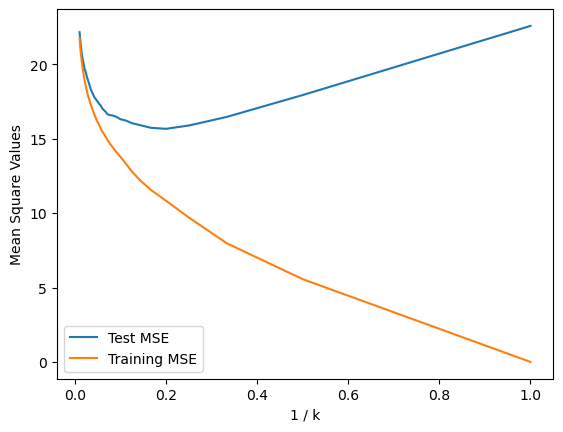

In [38]:
plt.plot(upon_k, test_plot, label= "Test MSE")
plt.plot(upon_k, train_plot, label= "Training MSE")
plt.ylabel("Mean Square Values")
plt.xlabel("1 / k")
plt.legend()
plt.show()

In [39]:
sorted_raw = sorted(final_test_list, key= lambda x: (x[1], - x[0]))
best_k, best_MSE = sorted_raw[0]
print("Best K for raw KNN model:", best_k, "and its MSE:", best_MSE)

Best K for raw KNN model: 5 and its MSE: 15.6635051689307


In [40]:
scaler = MinMaxScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.fit_transform(x_test)
x_train_normalized = pd.DataFrame(x_train_scale)
x_test_normalized = pd.DataFrame(x_test_scale)

In [41]:
final_test_normalized_list = []
final_train_normalized_list = [] 
for k in range(1,101,1):
    temp1, temp2 = [], []
    knn_normalized = KNeighborsRegressor(n_neighbors = k)
    knn_normalized.fit(x_train_normalized, y_train) 
    pred_normalized_test = knn_normalized.predict(x_test_normalized)
    mse_test_normalized = (mean_squared_error(y_test, pred_normalized_test)) 
    temp1.append(k)
    temp1.append(mse_test_normalized)
    pred_normalized_test = knn_normalized.predict(x_train_normalized)
    mse_train_normalized = (mean_squared_error(y_train, pred_normalized_test)) 
    temp2.append(k)
    temp2.append(mse_train_normalized)
    final_test_normalized_list.append(temp1)
    final_train_normalized_list.append(temp2)

final_test_normalized_list

[[1, 24.29258369905957],
 [2, 17.8007201497736],
 [3, 16.0447649444638],
 [4, 15.210558631574367],
 [5, 14.895724154649953],
 [6, 14.659682056194127],
 [7, 14.740871867869409],
 [8, 14.744094264302506],
 [9, 14.86004621093868],
 [10, 14.870464735980502],
 [11, 14.973352600671875],
 [12, 15.00490837058324],
 [13, 15.083524397412209],
 [14, 15.149502264197222],
 [15, 15.283299579705108],
 [16, 15.39772912530478],
 [17, 15.42823604678211],
 [18, 15.578019376287358],
 [19, 15.658788425954068],
 [20, 15.746494367380699],
 [21, 15.7494617031998],
 [22, 15.834695614091904],
 [23, 15.9344216329253],
 [24, 16.068472766276265],
 [25, 16.127139326896554],
 [26, 16.194296013903575],
 [27, 16.307518521050827],
 [28, 16.398553617055498],
 [29, 16.471872735141822],
 [30, 16.51945298223616],
 [31, 16.570125892242615],
 [32, 16.61529071683973],
 [33, 16.698775021325634],
 [34, 16.743987083428237],
 [35, 16.801019132521557],
 [36, 16.8710995798771],
 [37, 16.911115292009796],
 [38, 16.917746382561898],


In [42]:
test_plot_normalized = []
train_plot_normalized = []

for i, j in zip(final_test_normalized_list, final_train_normalized_list):
    test_plot_normalized.append(i[1])
    train_plot_normalized.append(j[1])

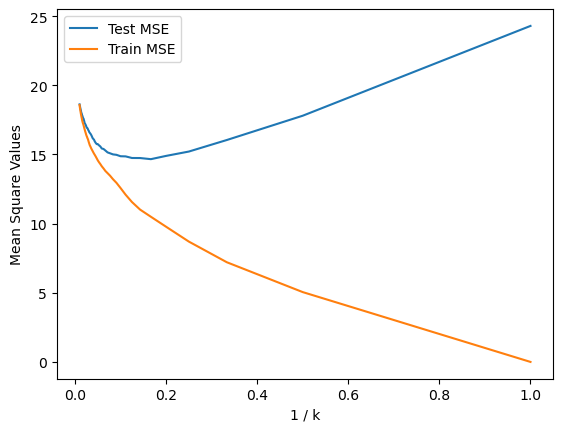

In [43]:
plt.plot(upon_k, test_plot_normalized, label= "Test MSE")
plt.plot(upon_k, train_plot_normalized, label= "Train MSE")
plt.ylabel("Mean Square Values")
plt.xlabel("1 / k")
plt.legend()
plt.show()

In [44]:
sorted_normalized = sorted(final_test_normalized_list, key= lambda x: (x[1], -x[0]))
best_k_normalized, best_mse_normalized = sorted_normalized[0]
print("Best K for Normalized KNN model:", best_k_normalized, "and its MSE:", best_mse_normalized)

Best K for Normalized KNN model: 6 and its MSE: 14.659682056194127


### (j) Compare the results of KNN Regression with the linear regression model that has the smallest test error and provide your analysis.

In [45]:
comparison_table = {"Regression Model": ["Linear Regression with All Features",
                                         "Regression with Features Removed",
                                         "Raw KNN",
                                         "Normalized KNN"],
                    "Test MSE": [test_error_slm,
                                 mse_test_final,
                                 best_MSE,
                                 best_mse_normalized]
}
comparison = pd.DataFrame(data= comparison_table)
comparison

,Regression Model,Test MSE
0,Linear Regression with All Features,20.368383
1,Regression with Features Removed,17.565670
2,Raw KNN,15.663505
3,Normalized KNN,14.659682


## 2. ISLR: 2.4.1

### 1. For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

### (a) The sample size n is extremely large, and the number of predictors p is small.

- For an Inflexible statistical learning method, a large sample size and a small number of predictors can cause the model to underfit.
- A Flexible method will perform better than an inflexible method.

### (b) The number of predictors p is extremely large, and the number of observations n is small.

- For a Flexible statistical learning method, a small sample size and a large number of predictors will cause the model to overfit.
- A Flexible method will perform worse than an inflexible method.

### (c) The relationship between the predictors and response is highly non-linear

- For an Inflexible statistical learning method, the model will not be able to adjust to the variances of a highly non-linear relationship between the predictors and response.
-  A Flexible method will perform better than a non-flexible method.

### (d) The variance of the error terms, i.e. σ2 = Var(), is extremely high.

- High variance results in overfitting.
- A Flexible statistical learning method will perform worse than an inflexible method.

## 3. ISLR: 2.4.7

### (a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

In [46]:
x = [[0, 3, 0], [2, 0, 0], [0, 1, 3], [0, 1, 2], [-1, 0, 1], [1, 1, 1]]
test = [[0, 0, 0]]
eu_dist = euclidean_distances(x, test)
eu_dist

array([[3.        ],
       [2.        ],
       [3.16227766],
       [2.23606798],
       [1.41421356],
       [1.73205081]])

### (b) What is our prediction with K = 1? Why?

- We predict that the output for K = 1 would be observation number 5 as it is the closest to the test point.
- Hence, the prediction of Y is Green.

### (c) What is our prediction with K = 3? Why?

- We predict that the output for K = 3
, would be Observation numbers 2 (Red), 5 (Green,) and 6 (Red)
- By majority, the  prediciont that the output is going to be Red

### (d) If the Bayes decision boundary in this problem is highly nonlinear, then would we expect the best value for K to be large or small? Why?

- The value of K is inversely proportional to the model's flexibility. As K increases, a more linear boundary is achieved.
- As the decision boundary of the problem is highly non-linear, the value of K would be small.